In [9]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from plot_utils import doubleplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from Strip2DFFT import doFilterFFT, do2DFFT, do2DInverseFFT, FFTStrip

In [10]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/'
sourceimage = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/KymographN5Circle.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [11]:
#Enter time unit in seconds
Time_unit = 5

#Remove the first zero line if there, else put 0
CutSectionX = 1
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 600
#Range of Plot in Hertz
maxXrange = 0.1

In [12]:
y = imread(sourceimage)
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)




width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:Yrange]

y = cutX

 
fsmally = y[StartSection:EndSection, :]
Start = StartSection
End = EndSection

axes = 'YX'

551   241


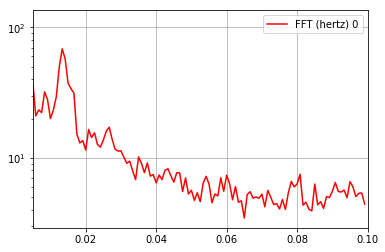

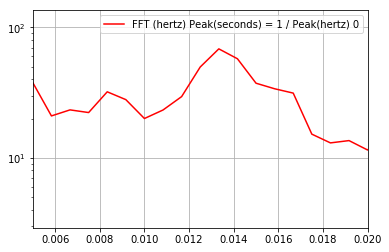

In [13]:

allfrequ = 0


 
fsmally = y[StartSection:EndSection, :]

   
onedimg, frequ = doFilterFFT(fsmally, Time_unit, False)
allfrequ=onedimg
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz)' + ' ' + str(block)]) 
plt.savefig(targetdir + 'CircleFits' + Filename[0] + '.png')

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.02 )

plt.grid()
plt.legend(['FFT (hertz) Peak(seconds) = 1 / Peak(hertz)' + ' ' + str(block)]) 


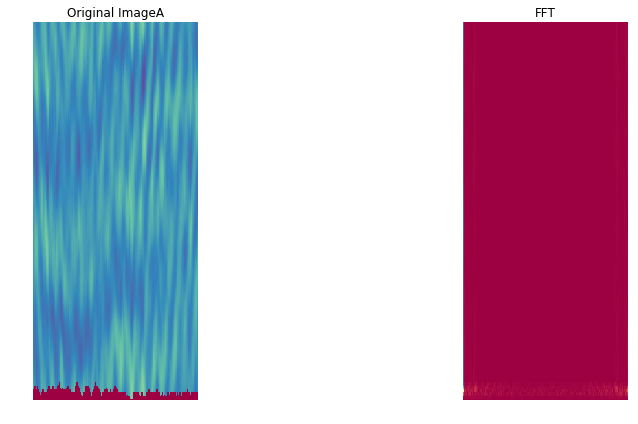

/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
/Users/aimachine/PyImage/utils/Normalize.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


In [14]:
TwoDimage = FFTStrip(fsmally)
doubleplot(fsmally, TwoDimage, "Original ImageA",  "FFT")
save_tiff_imagej_compatible((targetdir + "TwoDFFT" +os.path.basename(Filename[0]) +os.path.basename(Filename[1]) ) , TwoDimage, axes)